<a href="https://colab.research.google.com/github/ZangaMhdTRAORE/TP_IFRISSE/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PoissonRegressor
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

n_samples, n_features = 1000, 20
rng = np.random.RandomState(0)
X = rng.randn(n_samples, n_features)
# positive integer target correlated with X[:, 5] with many zeros:
y = rng.poisson(lam=np.exp(X[:, 5]) / 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)
glm = PoissonRegressor()
gbdt = HistGradientBoostingRegressor(loss='poisson', learning_rate=.01)
glm.fit(X_train, y_train)
gbdt.fit(X_train, y_train)
print(glm.score(X_test, y_test))
print(gbdt.score(X_test, y_test))

0.35776189065725783
0.42425183539869415


In [ ]:
from sklearn import set_config
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
set_config(display='diagram')

num_proc = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

cat_proc = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

preprocessor = make_column_transformer((num_proc, ('feat1', 'feat3')),
                                       (cat_proc, ('feat0', 'feat2')))

clf = make_pipeline(preprocessor, LogisticRegression())
clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ('feat1', 'feat3')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ('feat0', 'feat2'))])),
                ('logisticregression', LogisticRegression())])

In [ ]:
import scipy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import completeness_score

rng = np.random.RandomState(0)
X, y = make_blobs(random_state=rng)
X = scipy.sparse.csr_matrix(X)
X_train, X_test, _, y_test = train_test_split(X, y, random_state=rng)
kmeans = KMeans(algorithm='elkan').fit(X_train)
print(completeness_score(kmeans.predict(X_test), y_test))

0.7571304089239169


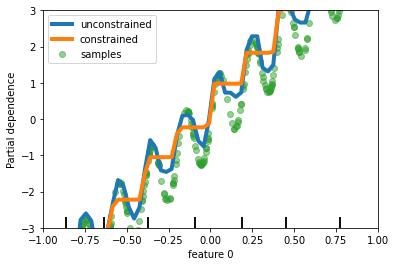

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor

n_samples = 500
rng = np.random.RandomState(0)
X = rng.randn(n_samples, 2)
noise = rng.normal(loc=0.0, scale=0.01, size=n_samples)
y = (5 * X[:, 0] + np.sin(10 * np.pi * X[:, 0]) - noise)

gbdt_no_cst = HistGradientBoostingRegressor().fit(X, y)
gbdt_cst = HistGradientBoostingRegressor(monotonic_cst=[1, 0]).fit(X, y)

disp = plot_partial_dependence(
    gbdt_no_cst, X, features=[0], feature_names=['feature 0'],
    line_kw={'linewidth': 4, 'label': 'unconstrained'})
plot_partial_dependence(gbdt_cst, X, features=[0],
    line_kw={'linewidth': 4, 'label': 'constrained'}, ax=disp.axes_)
disp.axes_[0, 0].plot(X[:, 0], y, 'o', alpha=.5, zorder=-1, label='samples')
disp.axes_[0, 0].set_ylim(-3, 3); disp.axes_[0, 0].set_xlim(-1, 1)
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
import numpy as np

n_samples, n_features = 1000, 20
rng = np.random.RandomState(0)
X, y = make_regression(n_samples, n_features, random_state=rng)
sample_weight = rng.rand(n_samples)
X_train, X_test, y_train, y_test, sw_train, sw_test = train_test_split(
    X, y, sample_weight, random_state=rng)
reg = Lasso()
reg.fit(X_train, y_train, sample_weight=sw_train)
print(reg.score(X_test, y_test, sw_test))

0.999791942438998


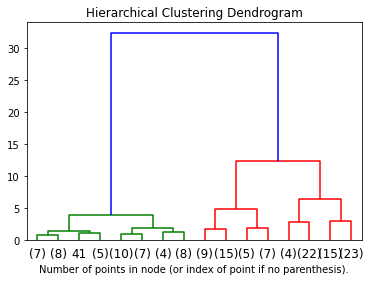

In [ ]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


iris = load_iris()
X = iris.data

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()